q1

Converged after 1334 iterations
Learned theta: [66.22189946 -0.43754893]


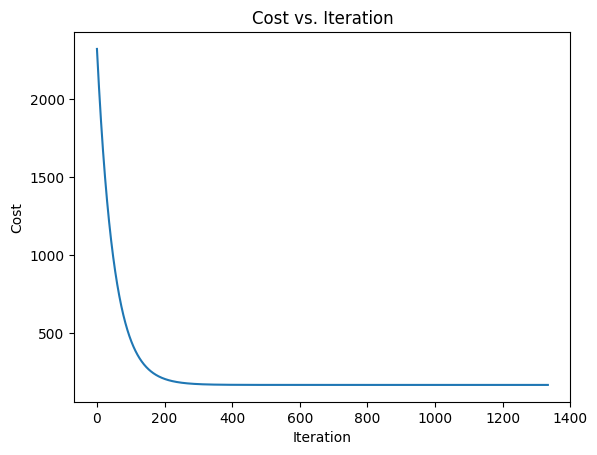

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]
m = len(y)

def feature_normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

X_norm, mu, sigma = feature_normalize(X)
X_b = np.c_[np.ones(m), X_norm]
theta = np.zeros(2)
alpha = 0.01
iterations = 1500

def compute_cost(X, y, theta):
    errors = X @ theta - y
    return (1 / (2 * m)) * np.dot(errors, errors)

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for i in range(iterations):
        gradient = (1 / m) * (X.T @ (X @ theta - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < 1e-10:
            print(f"Converged after {i} iterations")
            break
    return theta, cost_history

theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)
print("Learned theta:", theta)

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()

q2

Learned theta: [0.58922967 0.28170515 0.25264327]


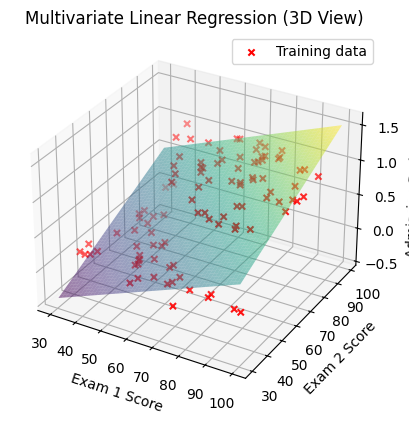

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = np.loadtxt("ex2data1.txt", delimiter=",")
x = data[:, 0:2]   # Two features: Exam 1 and Exam 2 scores
y = data[:, 2]     # Target: Admission (0 or 1)
m = len(y)

# Feature normalization
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
x_norm = (x - x_mean) / x_std

# Add intercept term
x_b = np.c_[np.ones((m, 1)), x_norm]
theta = np.zeros(x_b.shape[1])

# Gradient descent
def gradient_descent(x, y, theta, alpha, iterations):
    for _ in range(iterations):
        gradient = (1 / m) * (x.T @ (x @ theta - y))
        theta -= alpha * gradient
    return theta

# Parameters
alpha = 0.01
iterations = 400

# Train model
theta = gradient_descent(x_b, y, theta, alpha, iterations)
print("Learned theta:", theta)

# ===============================
# 3D Plotting of Training Data & Hypothesis
# ===============================
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original data (not normalized)
exam1 = x[:, 0]
exam2 = x[:, 1]

# Plot training points
ax.scatter(exam1, exam2, y, c='r', marker='x', label='Training data')

# Generate prediction surface
exam1_range = np.linspace(exam1.min(), exam1.max(), 50)
exam2_range = np.linspace(exam2.min(), exam2.max(), 50)
exam1_grid, exam2_grid = np.meshgrid(exam1_range, exam2_range)

# Normalize the grid using same mean and std
exam1_grid_norm = (exam1_grid - x_mean[0]) / x_std[0]
exam2_grid_norm = (exam2_grid - x_mean[1]) / x_std[1]

# Stack and predict
grid_features = np.c_[np.ones(exam1_grid.size),exam1_grid_norm.ravel(),exam2_grid_norm.ravel()]
z = grid_features @ theta
z = z.reshape(exam1_grid.shape)

# Plot surface
ax.plot_surface(exam1_grid, exam2_grid, z, alpha=0.5, cmap='viridis')

# Labels
ax.set_xlabel("Exam 1 Score")
ax.set_ylabel("Exam 2 Score")
ax.set_zlabel("Admission Probability")
ax.set_title("Multivariate Linear Regression (3D View)")
plt.legend()
plt.show()


q3

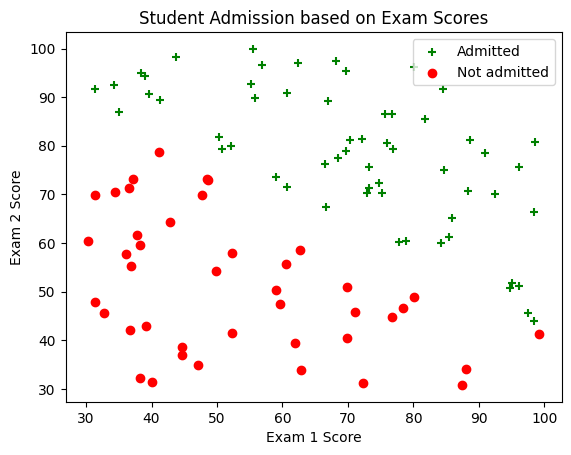

/tmp/ipython-input-905269844.py:40: RuntimeWarning: divide by zero encountered in log
  cost = (-y @ np.log(h) - (1 - y) @ np.log(1 - h)) / m
/tmp/ipython-input-905269844.py:40: RuntimeWarning: invalid value encountered in matmul
  cost = (-y @ np.log(h) - (1 - y) @ np.log(1 - h)) / m


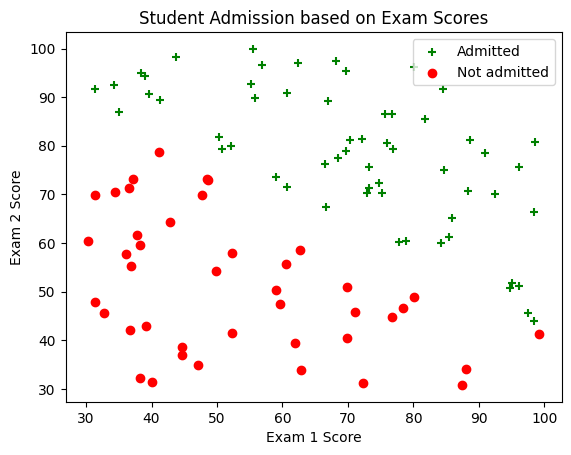

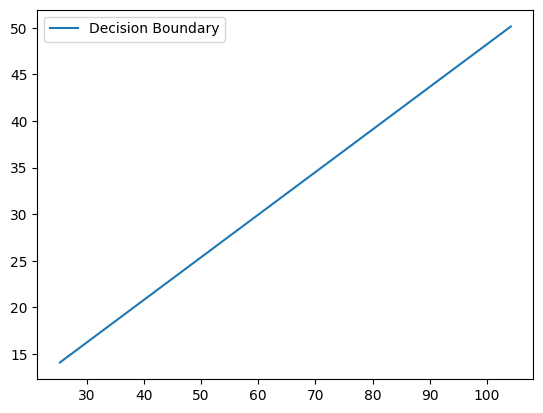

Training Accuracy: 60.00%


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Dataset
np.random.seed(0)  # For reproducibility

# Generate 100 random exam scores
exam1 = np.random.uniform(30, 100, 100)
exam2 = np.random.uniform(30, 100, 100)

# Admission logic: admit if weighted average > 65
admitted = (0.4 * exam1 + 0.6 * exam2) > 65
admitted = admitted.astype(int)

X = np.column_stack((exam1, exam2))
y = admitted

# 2. Plot Data
def plot_data(X, y):
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos][:, 0], X[pos][:, 1], c='g', marker='+', label='Admitted')
    plt.scatter(X[neg][:, 0], X[neg][:, 1], c='r', marker='o', label='Not admitted')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend()
    plt.title('Student Admission based on Exam Scores')
    plt.show()

plot_data(X, y)

# 3. Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-y @ np.log(h) - (1 - y) @ np.log(1 - h)) / m
    return cost

# 5. Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (X.T @ (h - y)) / m
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# 6. Prepare Data
X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
theta = np.zeros(X_with_bias.shape[1])

# Train model
theta, cost_history = gradient_descent(X_with_bias, y, theta, alpha=0.01, num_iters=1000)

# 7. Plot Decision Boundary
def plot_decision_boundary(X, y, theta):
    plot_data(X[:, 1:], y)
    x_values = [np.min(X[:, 1]) - 5, np.max(X[:, 1]) + 5]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(X_with_bias, y, theta)

# 8. Evaluate Accuracy
def predict(X, theta):
    probability = sigmoid(X @ theta)
    return probability >= 0.5

predictions = predict(X_with_bias, theta)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


q4

/tmp/ipython-input-1100874551.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = mapped @ theta


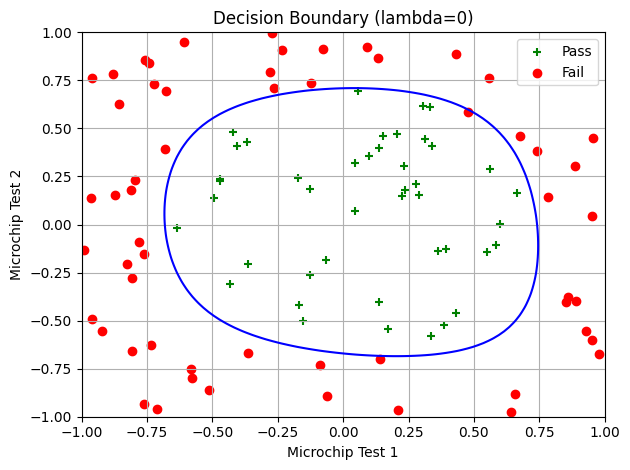

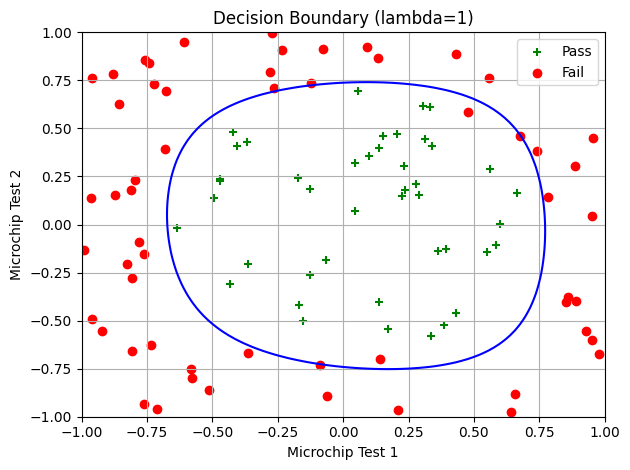

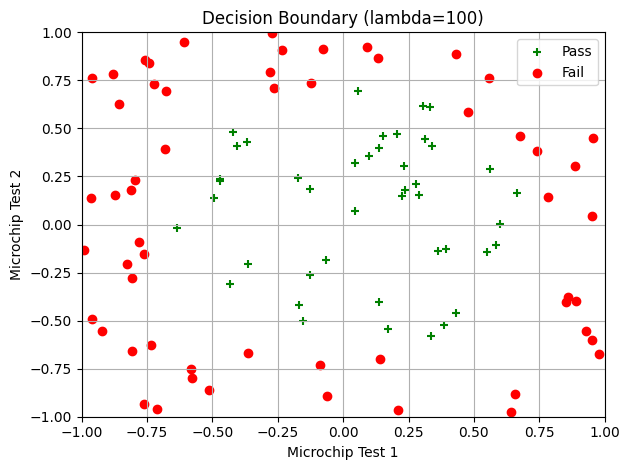


Discussion:
- λ = 0: No regularization. The model overfits and decision boundary is very complex.
- λ = 1: Balanced regularization. Good generalization with smooth boundary.
- λ = 100: Too much regularization. The model underfits and cannot separate classes well.



In [4]:
#A5q4
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Dataset
np.random.seed(0)
test1 = np.random.uniform(-1, 1, 100)
test2 = np.random.uniform(-1, 1, 100)

# Circular decision boundary logic (non-linear)
labels = ((test1**2 + test2**2) < 0.5).astype(int)

X = np.column_stack((test1, test2))
y = labels

# 2. Feature Mapping up to 6th degree
def map_features(x1, x2, degree=6):
    m = x1.shape[0]
    output = np.ones((m, 1))
    for i in range(1, degree+1):
        for j in range(i+1):
            term = (x1**(i-j) * x2**j).reshape(m, 1)
            output = np.hstack((output, term))
    return output

# 3. Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. Regularized Cost Function
def compute_cost_reg(X, y, theta, lambda_):
    m = len(y)
    h = sigmoid(X @ theta)
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    cost = (-y @ np.log(h) - (1 - y) @ np.log(1 - h)) / m + reg_term
    return cost

# 5. Regularized Gradient Descent
def gradient_descent_reg(X, y, theta, alpha, num_iters, lambda_):
    m = len(y)
    cost_history = []

    for _ in range(num_iters):
        h = sigmoid(X @ theta)
        grad = (X.T @ (h-y)) / m
        grad[1:] += (lambda_ / m) * theta[1:]
        theta -= alpha * grad
        cost_history.append(compute_cost_reg(X, y, theta, lambda_))

    return theta, cost_history

# 6. Plot Decision Boundary
def plot_decision_boundary(X_raw, y, theta, lambda_):
    u = np.linspace(-1, 1, 100)
    v = np.linspace(-1, 1, 100)
    z = np.zeros((len(u), len(v)))

    for i in range(len(u)):
        for j in range(len(v)):
            mapped = map_features(np.array([u[i]]), np.array([v[j]]))
            z[i, j] = mapped @ theta

    plt.contour(u, v, z.T, levels=[0], colors='b')
    pos = y == 1
    neg = y == 0
    plt.scatter(X_raw[pos][:, 0], X_raw[pos][:, 1], c='g', marker='+', label='Pass')
    plt.scatter(X_raw[neg][:, 0], X_raw[neg][:, 1], c='r', marker='o', label='Fail')
    plt.title(f"Decision Boundary (lambda={lambda_})")
    plt.legend()
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 7. Training for different λ values
X_mapped = map_features(X[:, 0], X[:, 1])
theta_init = np.zeros(X_mapped.shape[1])
lambda_values = [0, 1, 100]

for lambda_ in lambda_values:
    theta_opt, _ = gradient_descent_reg(X_mapped, y, theta_init.copy(), alpha=1, num_iters=1000, lambda_=lambda_)
    plot_decision_boundary(X, y, theta_opt, lambda_)

# 8. Effect of underfitting vs overfitting
print("""
Discussion:
- λ = 0: No regularization. The model overfits and decision boundary is very complex.
- λ = 1: Balanced regularization. Good generalization with smooth boundary.
- λ = 100: Too much regularization. The model underfits and cannot separate classes well.
""")


q5

Learned Parameters (θ): [ 0.          1.2882143  -0.56101382 -0.2448971   0.08034125 -0.00525301]


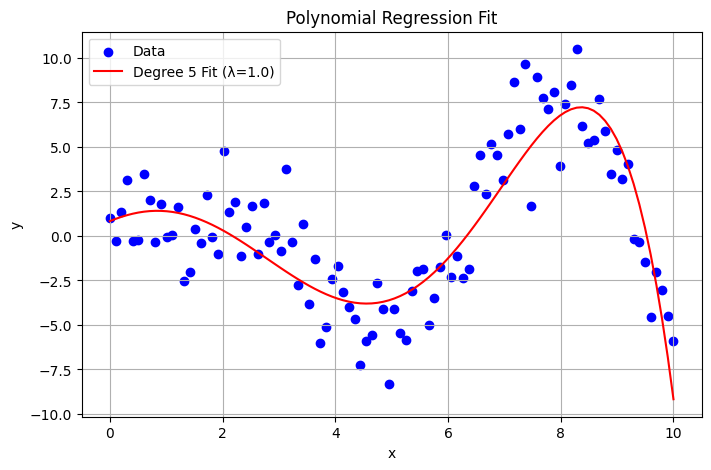

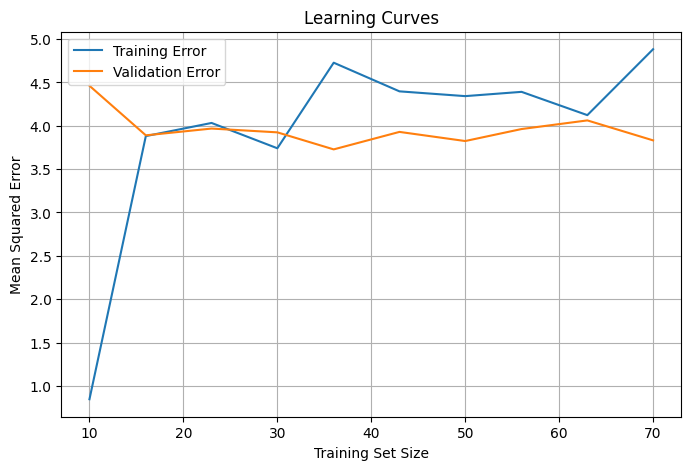

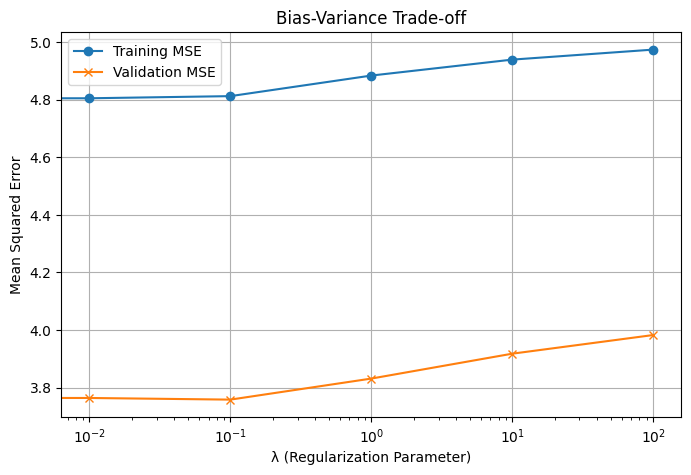

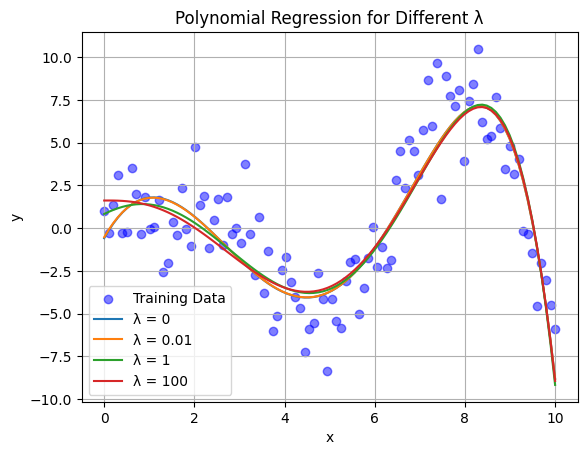

In [5]:
#A5q5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic non-linear dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = X.ravel() * np.sin(X.ravel()) + np.random.normal(0, 2, X.shape[0])

# Step 2: Polynomial feature transformation
poly_degree = 5
poly = PolynomialFeatures(degree=poly_degree)
X_poly = poly.fit_transform(X)

# Step 3: Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Step 4: Train model with Ridge regularization
lambda_val = 1.0
model = Ridge(alpha=lambda_val)
model.fit(X_train, y_train)

# Step 5: Predict for plotting
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Print learned parameters
print("Learned Parameters (θ):", model.coef_)

# Step 6: Plot polynomial fit
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_plot, y_plot, color='red', label=f'Degree {poly_degree} Fit (λ={lambda_val})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Plot learning curves
def plot_learning_curve(model, X_train, y_train, X_val, y_val, train_sizes):
    train_errors = []
    val_errors = []

    for m in train_sizes:
        model.fit(X_train[:m], y_train[:m])
        train_pred = model.predict(X_train[:m])
        val_pred = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], train_pred))
        val_errors.append(mean_squared_error(y_val, val_pred))

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, val_errors, label='Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

train_sizes = np.linspace(10, len(X_train), 10, dtype=int)
plot_learning_curve(Ridge(alpha=lambda_val), X_train, y_train, X_val, y_val, train_sizes)

# Step 8: Analyze bias-variance trade-off by varying λ
lambdas = [0, 0.01, 0.1, 1, 10, 100]
train_mse = []
val_mse = []

for l in lambdas:
    model = Ridge(alpha=l)
    model.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    val_mse.append(mean_squared_error(y_val, model.predict(X_val)))

plt.figure(figsize=(8, 5))
plt.plot(lambdas, train_mse, marker='o', label='Training MSE')
plt.plot(lambdas, val_mse, marker='x', label='Validation MSE')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()

lambdas = [0, 0.01, 1, 100]
plt.scatter(X,y,color = 'blue',label ='Training Data',alpha=0.5)
for i,l in enumerate(lambdas):
    model = Ridge(alpha=l)
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, y_plot, label=f'λ = {l}')

plt.title('Polynomial Regression for Different λ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

q6

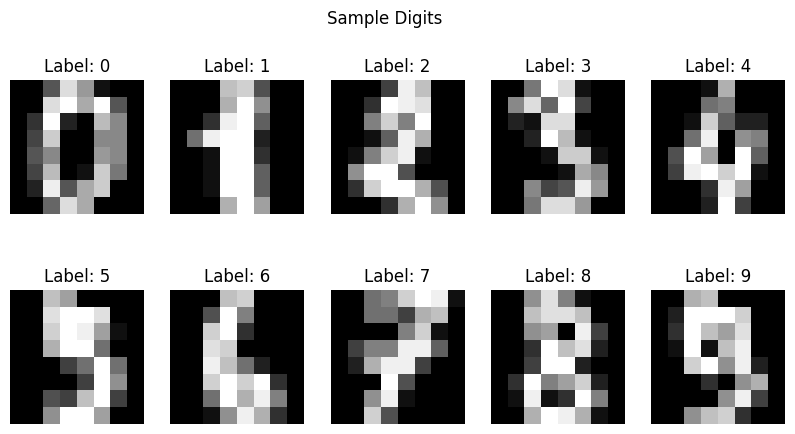

/tmp/ipython-input-3684129091.py:53: OptimizeWarning: Unknown solver options: maxiter
  res = minimize(fun=cost_function, x0=theta0, args=(X, y_c, reg_lambda),


Training Accuracy (OvA): 99.8330550918197 %
Class 0 θ (first 10): [-1.58371213e+01  0.00000000e+00 -4.93111355e-02  2.87961735e-02
  1.04438465e-01 -2.34019581e-02 -4.57570829e-01 -3.79322373e-01
 -3.98554685e-02 -1.87159599e-07]
Class 1 θ (first 10): [-6.64411009e+01  0.00000000e+00  7.06199524e-01  3.75379283e-01
  7.57703980e-01 -2.96798111e+00  2.87627088e+00 -1.95187730e+00
  4.67274482e-05 -6.42097641e-08]
Class 2 θ (first 10): [-1.91394805e+01  0.00000000e+00  6.79855125e-02 -1.37509120e-01
  1.98032597e-01 -7.26689422e-02 -2.43614200e-01 -1.29044305e-01
 -1.27536235e-02 -3.05310934e-05]
Class 3 θ (first 10): [-1.96031106e+01  0.00000000e+00  3.30367340e-01 -1.77209828e+00
  4.01301574e-01  1.28905181e+00 -4.11276365e-01 -9.28434476e-01
  6.51533504e-01 -7.16210612e-03]
Class 4 θ (first 10): [ 5.80672882e+00  0.00000000e+00 -8.01300668e-03 -4.92449847e-01
 -1.05398736e+00 -4.76354612e-01 -4.51776068e-01 -6.50401193e-01
  2.01869407e-01  3.06619087e-06]
Class 5 θ (first 10): [-2.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scikit-learn OvA Accuracy: 99.77740678909294 %


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load digits dataset
digits = load_digits()
X = digits.data  # shape: (1797, 64) — 64 features (8x8 images)
y = digits.target  # labels: 0-9

# Visualize some samples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray',alpha = 1)
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.suptitle('Sample Digits')
plt.show()

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost and gradient for logistic regression
def cost_function(theta, X, y, reg_lambda):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # for numerical stability
    cost = (-y @ np.log(h + epsilon) - (1 - y) @ np.log(1 - h + epsilon)) / m
    reg = (reg_lambda / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost + reg

def gradient(theta, X, y, reg_lambda):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (X.T @ (h - y)) / m
    grad[1:] += (reg_lambda / m) * theta[1:]
    return grad

# Add intercept term
X = np.insert(X, 0, 1, axis=1)  # shape: (1797, 65)

# One-vs-All Training
def one_vs_all(X, y, num_labels, reg_lambda=0.1):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n))

    from scipy.optimize import minimize
    for c in range(num_labels):
        y_c = (y == c).astype(int)  # binary for class c
        theta0 = np.zeros(n)
        res = minimize(fun=cost_function, x0=theta0, args=(X, y_c, reg_lambda),
                       jac=gradient, method='TNC', options={'maxiter': 300})
        all_theta[c] = res.x
    return all_theta

# Prediction
def predict_one_vs_all(all_theta, X):
    probs = sigmoid(X @ all_theta.T)  # shape: (m, num_labels)
    return np.argmax(probs, axis=1)

# Train the OvA logistic regression
num_labels = 10  # digits 0-9
reg_lambda = 0.1
all_theta = one_vs_all(X, y, num_labels, reg_lambda)

# Predict and compute accuracy
y_pred = predict_one_vs_all(all_theta, X)
accuracy = accuracy_score(y, y_pred)

print("Training Accuracy (OvA):", accuracy * 100, "%")

# Display learned theta for each class (first 10 coefficients)
for i in range(num_labels):
    print(f"Class {i} θ (first 10):", all_theta[i][:10])

# Built-in Logistic Regression for comparison
clf = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=300)
clf.fit(digits.data, digits.target)
sk_accuracy = clf.score(digits.data, digits.target)
print("Scikit-learn OvA Accuracy:", sk_accuracy * 100, "%")
